In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Crashes = pd.read_csv('Nigerian_Road_Traffic_Crashes_2020_2024.csv')

In [3]:
Crashes

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66
...,...,...,...,...,...,...,...,...,...,...,...
513,Q1 2024,Rivers,15,32,4,21,17,0,0,0,4
514,Q1 2024,Sokoto,24,122,41,52,41,0,0,0,11
515,Q1 2024,Taraba,38,98,17,38,17,0,0,0,21
516,Q1 2024,Yobe,39,234,13,55,38,0,0,0,17


In [4]:
Crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Quarter                  518 non-null    object
 1   State                    518 non-null    object
 2   Total_Crashes            518 non-null    int64 
 3   Num_Injured              518 non-null    int64 
 4   Num_Killed               518 non-null    int64 
 5   Total_Vehicles_Involved  518 non-null    int64 
 6   SPV                      518 non-null    int64 
 7   DAD                      518 non-null    int64 
 8   PWR                      518 non-null    int64 
 9   FTQ                      518 non-null    int64 
 10  Other_Factors            518 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 44.6+ KB


In [5]:
Crashes.duplicated().value_counts()

False    518
Name: count, dtype: int64



1. **What is the trend of total crashes over the quarters across different states?**
   - **Objective:** Analyze the overall trend in total crashes over time and identify any seasonal patterns or spikes.

2. **Which state has the highest number of crashes in each quarter?**
   - **Objective:** Identify the states with the most crashes for each quarter to determine high-risk areas.

3. **What is the correlation between the number of injured and the number of killed in crashes across different states?**
   - **Objective:** Explore the relationship between injury severity and fatalities in crashes.

4. **How do different factors (Speed Violation, Alcohol/Drug Influence, Poor Weather, Fatigue) contribute to the total number of crashes in each state?**
   - **Objective:** Understand the impact of various factors on crash occurrences in different states.

5. **Which state has the highest percentage of crashes involving speed violations (SPV) in each quarter?**
   - **Objective:** Identify the states where speeding is a significant factor in crashes.

6. **What is the distribution of crashes with fatalities compared to those without, and how does this vary by state and quarter?**
   - **Objective:** Compare the severity of crashes across different regions and time periods.

7. **How does poor weather (PWR) impact the total number of crashes and injuries in each state?**
   - **Objective:** Assess the influence of weather conditions on crash frequency and injury rates.

8. **Which quarter has the highest number of crashes involving driving under the influence (DAD), and how does it vary by state?**
   - **Objective:** Determine the time periods with the most DUI-related crashes.

9. **How does fatigue (FTQ) correlate with the number of vehicles involved in crashes across different states?**
   - **Objective:** Explore whether driver fatigue is linked to multi-vehicle crashes.

10. **What are the top contributing factors to crashes (Other_Factors) across different states, and how do they compare to other known factors?**
    - **Objective:** Analyze the significance of other contributing factors relative to speed violations, alcohol/lization and dashboard creation.

In [25]:
print(Crashes['Quarter'].unique())

['Q4 2020' 'Q1 2021' 'Q2 2021' 'Q3 2021' 'Q4 2021' 'Q1 2022' 'Q2 2022'
 'Q3 2022' 'Q4 2022' 'Q1 2023' 'Q2 2023' 'Q3 2023' 'Q4 2023' 'Q1 2024']


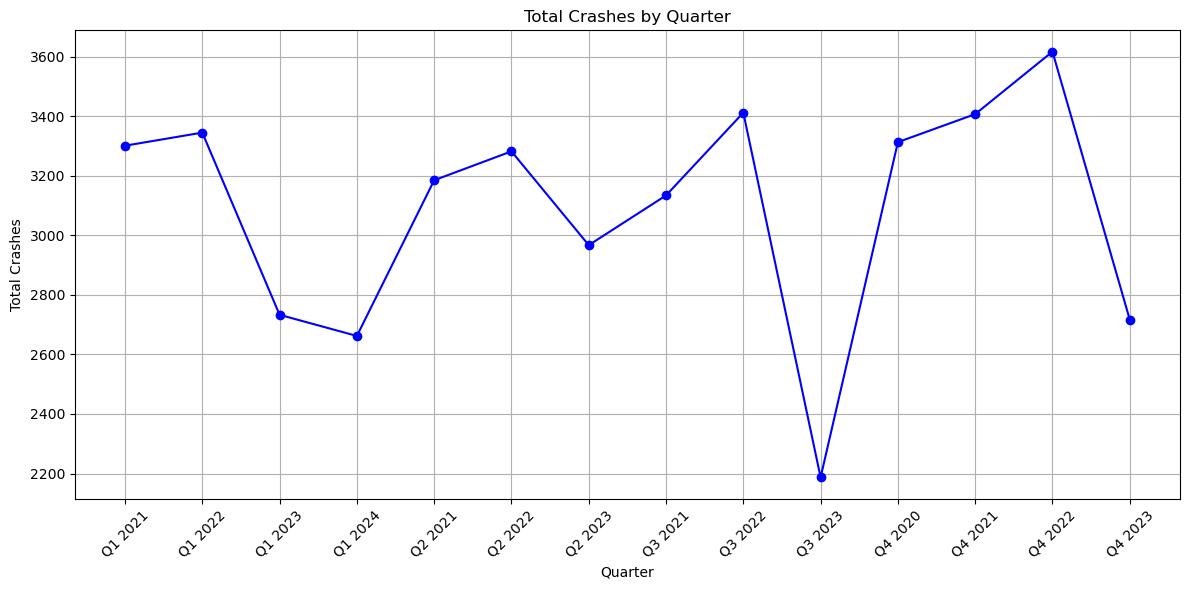

Total Crashes by Quarter:
Quarter
Q1 2021    3301
Q1 2022    3345
Q1 2023    2733
Q1 2024    2662
Q2 2021    3185
Q2 2022    3282
Q2 2023    2967
Q3 2021    3134
Q3 2022    3412
Q3 2023    2187
Q4 2020    3313
Q4 2021    3407
Q4 2022    3617
Q4 2023    2717
Name: Total_Crashes, dtype: int64


In [11]:
# Group by 'Quarter' and sum the 'Total_Crashes' directly
quarterly_crashes = Crashes.groupby('Quarter')['Total_Crashes'].sum()
# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(quarterly_crashes.index, quarterly_crashes.values, marker='o', linestyle='-', color='b')
plt.title('Total Crashes by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Crashes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("Total Crashes by Quarter:")
print(quarterly_crashes)

State with the highest number of crashes in each quarter:
     Quarter State  Total_Crashes
27   Q1 2021  Ogun            299
51   Q1 2022   FCT            319
88   Q1 2023   FCT            382
125  Q1 2024   FCT            273
175  Q2 2021  Ogun            337
199  Q2 2022   FCT            538
236  Q2 2023   FCT            320
273  Q3 2021   FCT            307
310  Q3 2022   FCT            464
347  Q3 2023   FCT            349
384  Q4 2020   FCT            312
434  Q4 2021  Ogun            286
458  Q4 2022   FCT            482
495  Q4 2023   FCT            296


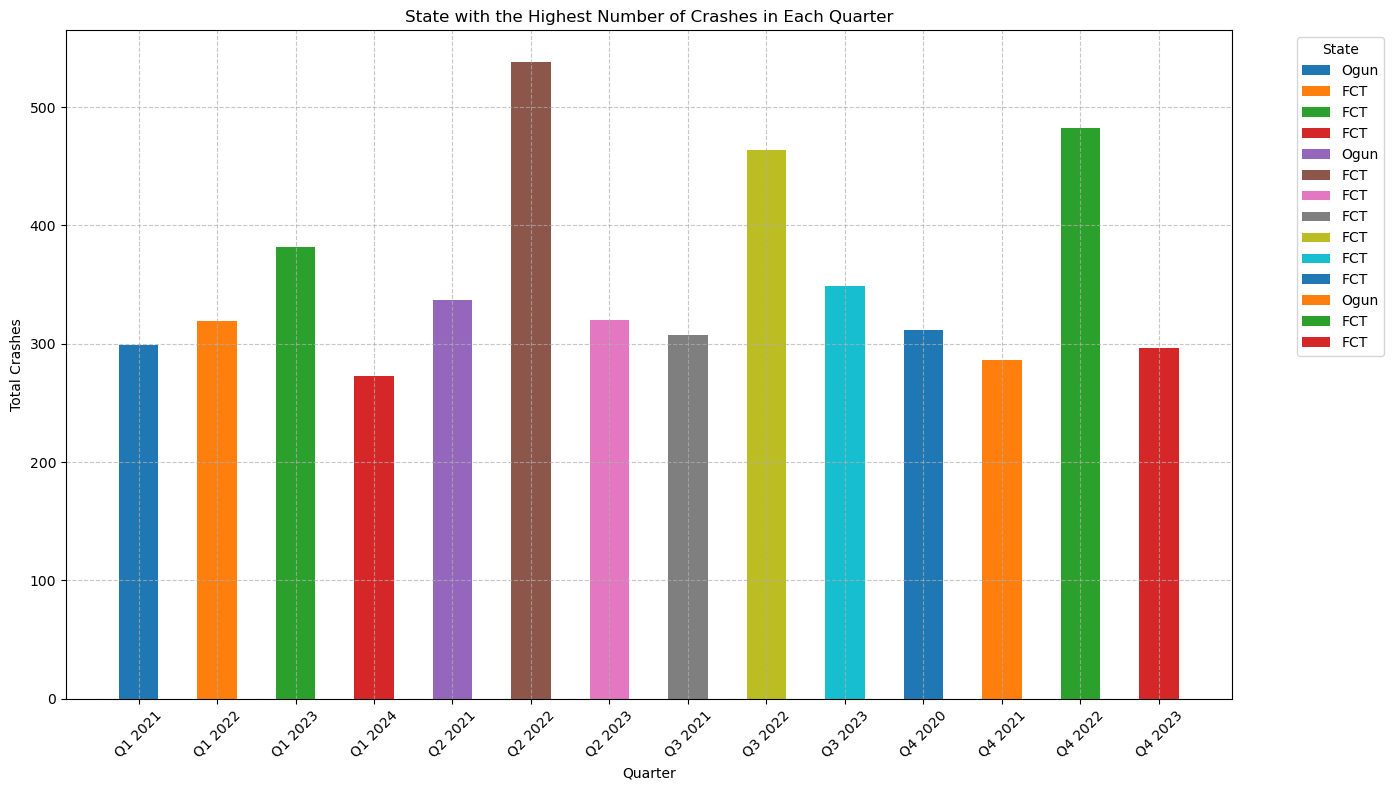

In [15]:
state_quarterly_crashes = Crashes.groupby(['Quarter', 'State'])['Total_Crashes'].sum().reset_index()

max_crashes_per_quarter = state_quarterly_crashes.loc[state_quarterly_crashes.groupby('Quarter')['Total_Crashes'].idxmax()]

print("State with the highest number of crashes in each quarter:")
print(max_crashes_per_quarter)

plt.figure(figsize=(14, 8))

for i, (quarter, group) in enumerate(max_crashes_per_quarter.groupby('Quarter')):
    plt.bar(
        x=[quarter], 
        height=group['Total_Crashes'],
        label=group['State'].values[0],
        width=0.5,
        align='center'
    )

plt.title('State with the Highest Number of Crashes in Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Crashes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Correlation between the number of injured and the number of killed: 0.87


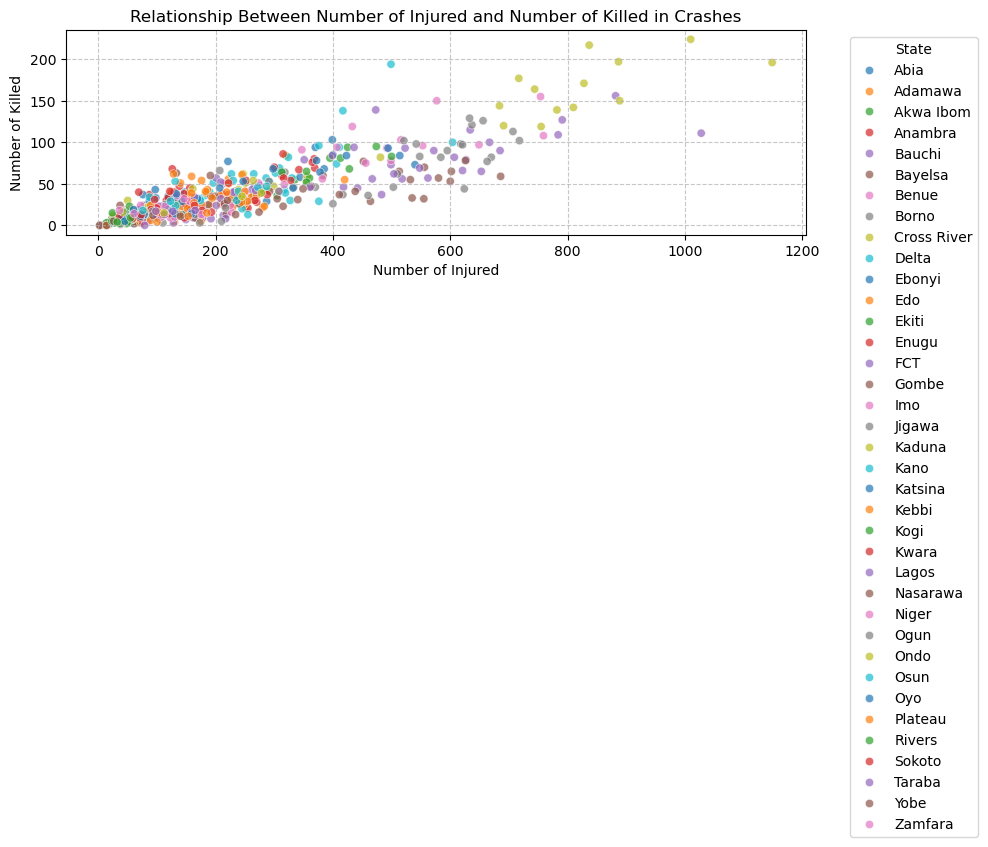

In [17]:
correlation = Crashes[['Num_Injured', 'Num_Killed']].corr().iloc[0, 1]

print(f"Correlation between the number of injured and the number of killed: {correlation:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=Crashes, x='Num_Injured', y='Num_Killed', hue='State', palette='tab10', alpha=0.7)

plt.title('Relationship Between Number of Injured and Number of Killed in Crashes')
plt.xlabel('Number of Injured')
plt.ylabel('Number of Killed')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

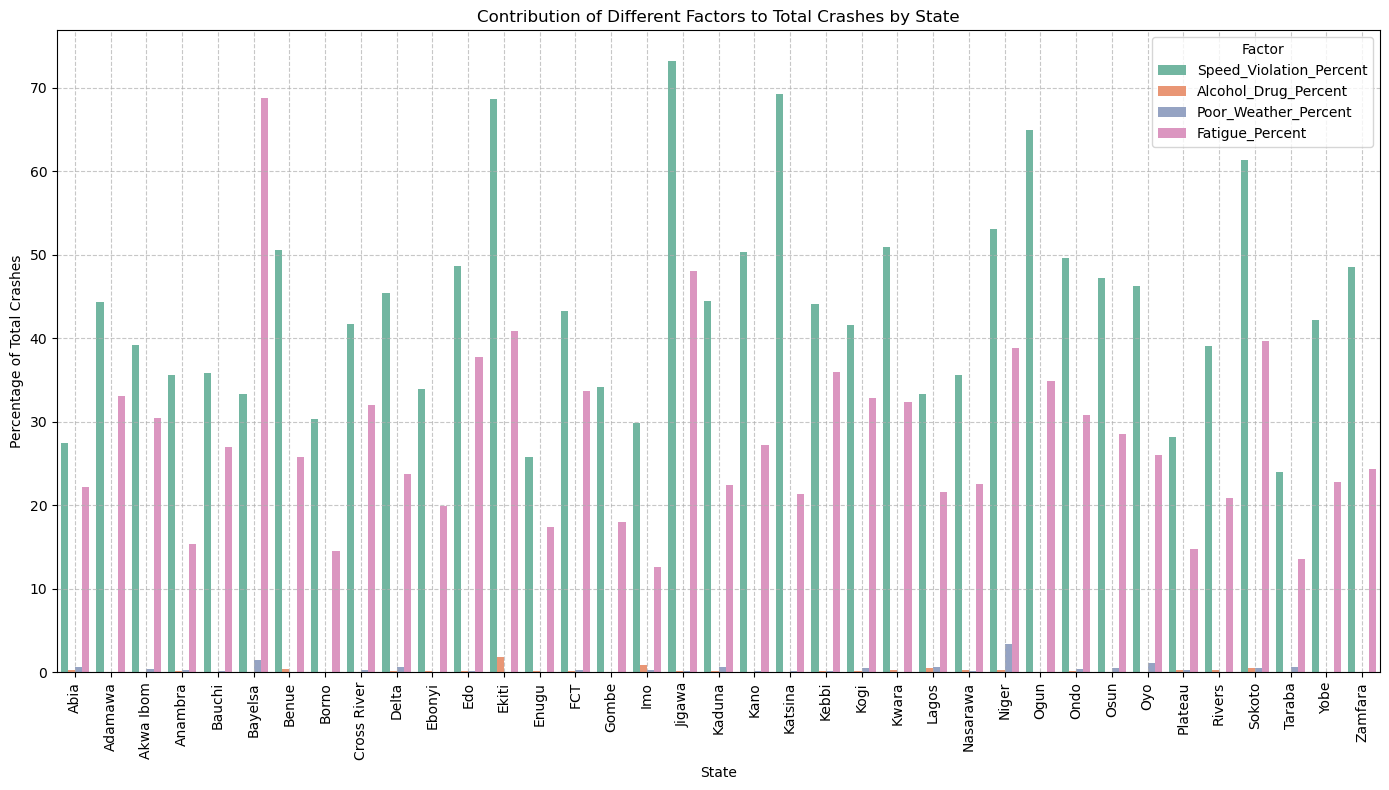

Contribution of Different Factors to Total Crashes by State:
          State  Speed_Violation_Percent  Alcohol_Drug_Percent  \
0          Abia                27.433628              0.294985   
1       Adamawa                44.270205              0.000000   
2     Akwa Ibom                39.166667              0.000000   
3       Anambra                35.646688              0.157729   
4        Bauchi                35.821794              0.060205   
5       Bayelsa                33.333333              0.000000   
6         Benue                50.511945              0.341297   
7         Borno                30.327869              0.000000   
8   Cross River                41.707317              0.000000   
9         Delta                45.373134              0.149254   
10       Ebonyi                33.864542              0.199203   
11          Edo                48.661800              0.121655   
12        Ekiti                68.637532              1.799486   
13        Enugu

In [20]:
state_factor_crashes = Crashes.groupby('State').agg({
    'Total_Crashes': 'sum',
    'SPV': 'sum',
    'DAD': 'sum',
    'PWR': 'sum',
    'FTQ': 'sum'
}).reset_index()


state_factor_crashes['Speed_Violation_Percent'] = (state_factor_crashes['SPV'] / state_factor_crashes['Total_Crashes']) * 100
state_factor_crashes['Alcohol_Drug_Percent'] = (state_factor_crashes['DAD'] / state_factor_crashes['Total_Crashes']) * 100
state_factor_crashes['Poor_Weather_Percent'] = (state_factor_crashes['PWR'] / state_factor_crashes['Total_Crashes']) * 100
state_factor_crashes['Fatigue_Percent'] = (state_factor_crashes['FTQ'] / state_factor_crashes['Total_Crashes']) * 100


melted_crashes = state_factor_crashes.melt(id_vars=['State'], 
                                           value_vars=['Speed_Violation_Percent', 'Alcohol_Drug_Percent', 'Poor_Weather_Percent', 'Fatigue_Percent'],
                                           var_name='Factor',
                                           value_name='Percentage')

plt.figure(figsize=(14, 8))
sns.barplot(data=melted_crashes, x='State', y='Percentage', hue='Factor', palette='Set2')

plt.title('Contribution of Different Factors to Total Crashes by State')
plt.xlabel('State')
plt.ylabel('Percentage of Total Crashes')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Factor')
plt.tight_layout()
plt.show()
print("Contribution of Different Factors to Total Crashes by State:")
print(state_factor_crashes[['State', 'Speed_Violation_Percent', 'Alcohol_Drug_Percent', 'Poor_Weather_Percent', 'Fatigue_Percent']])

State with the Highest Percentage of Crashes Involving Speed Violations in Each Quarter:
     Quarter    State           SPV
5    Q1 2021  Bayelsa   1428.571429
37   Q1 2022     Abia      9.182736
79   Q1 2023  Bayelsa   2222.222222
147  Q1 2024  Zamfara    828.402367
181  Q2 2021   Sokoto    661.625709
197  Q2 2022    Ekiti     10.405827
227  Q2 2023  Bayelsa    612.244898
259  Q3 2021     Abia     25.000000
308  Q3 2022    Ekiti     25.000000
338  Q3 2023  Bayelsa   2400.000000
375  Q4 2020  Bayelsa  10000.000000
438  Q4 2021  Plateau      3.652301
449  Q4 2022  Bayelsa    625.000000
517  Q4 2023  Zamfara    755.555556


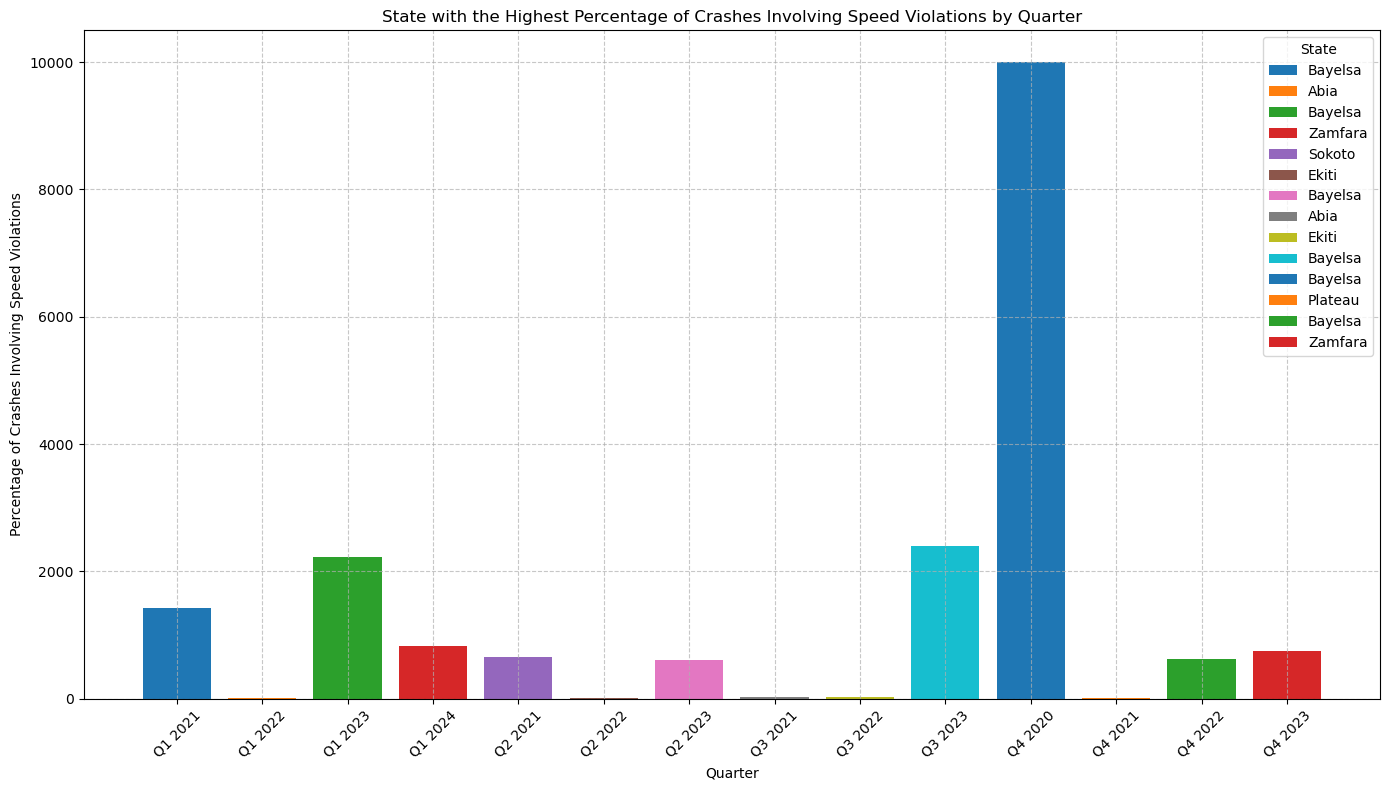

In [23]:
Crashes['SPV'] = (Crashes['SPV'] / Crashes['Total_Crashes']) * 100

quarterly_state_speeds = Crashes.groupby(['Quarter', 'State'])['SPV'].mean().reset_index()

max_speed_violations_per_quarter = quarterly_state_speeds.loc[quarterly_state_speeds.groupby('Quarter')['SPV'].idxmax()]

print("State with the Highest Percentage of Crashes Involving Speed Violations in Each Quarter:")
print(max_speed_violations_per_quarter)

plt.figure(figsize=(14, 8))
for quarter in max_speed_violations_per_quarter['Quarter'].unique():
    subset = max_speed_violations_per_quarter[max_speed_violations_per_quarter['Quarter'] == quarter]
    plt.bar(subset['Quarter'], subset['SPV'], label=subset['State'].values[0])

plt.title('State with the Highest Percentage of Crashes Involving Speed Violations by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Percentage of Crashes Involving Speed Violations')
plt.legend(title='State')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Distribution of Crashes with and without Fatalities by State and Quarter:
Has_Fatality    State  Quarter  False  True
0                Abia  Q1 2021      0     1
1                Abia  Q1 2022      0     1
2                Abia  Q1 2023      0     1
3                Abia  Q1 2024      0     1
4                Abia  Q2 2021      0     1
..                ...      ...    ...   ...
513           Zamfara  Q3 2023      0     1
514           Zamfara  Q4 2020      0     1
515           Zamfara  Q4 2021      0     1
516           Zamfara  Q4 2022      0     1
517           Zamfara  Q4 2023      0     1

[518 rows x 4 columns]


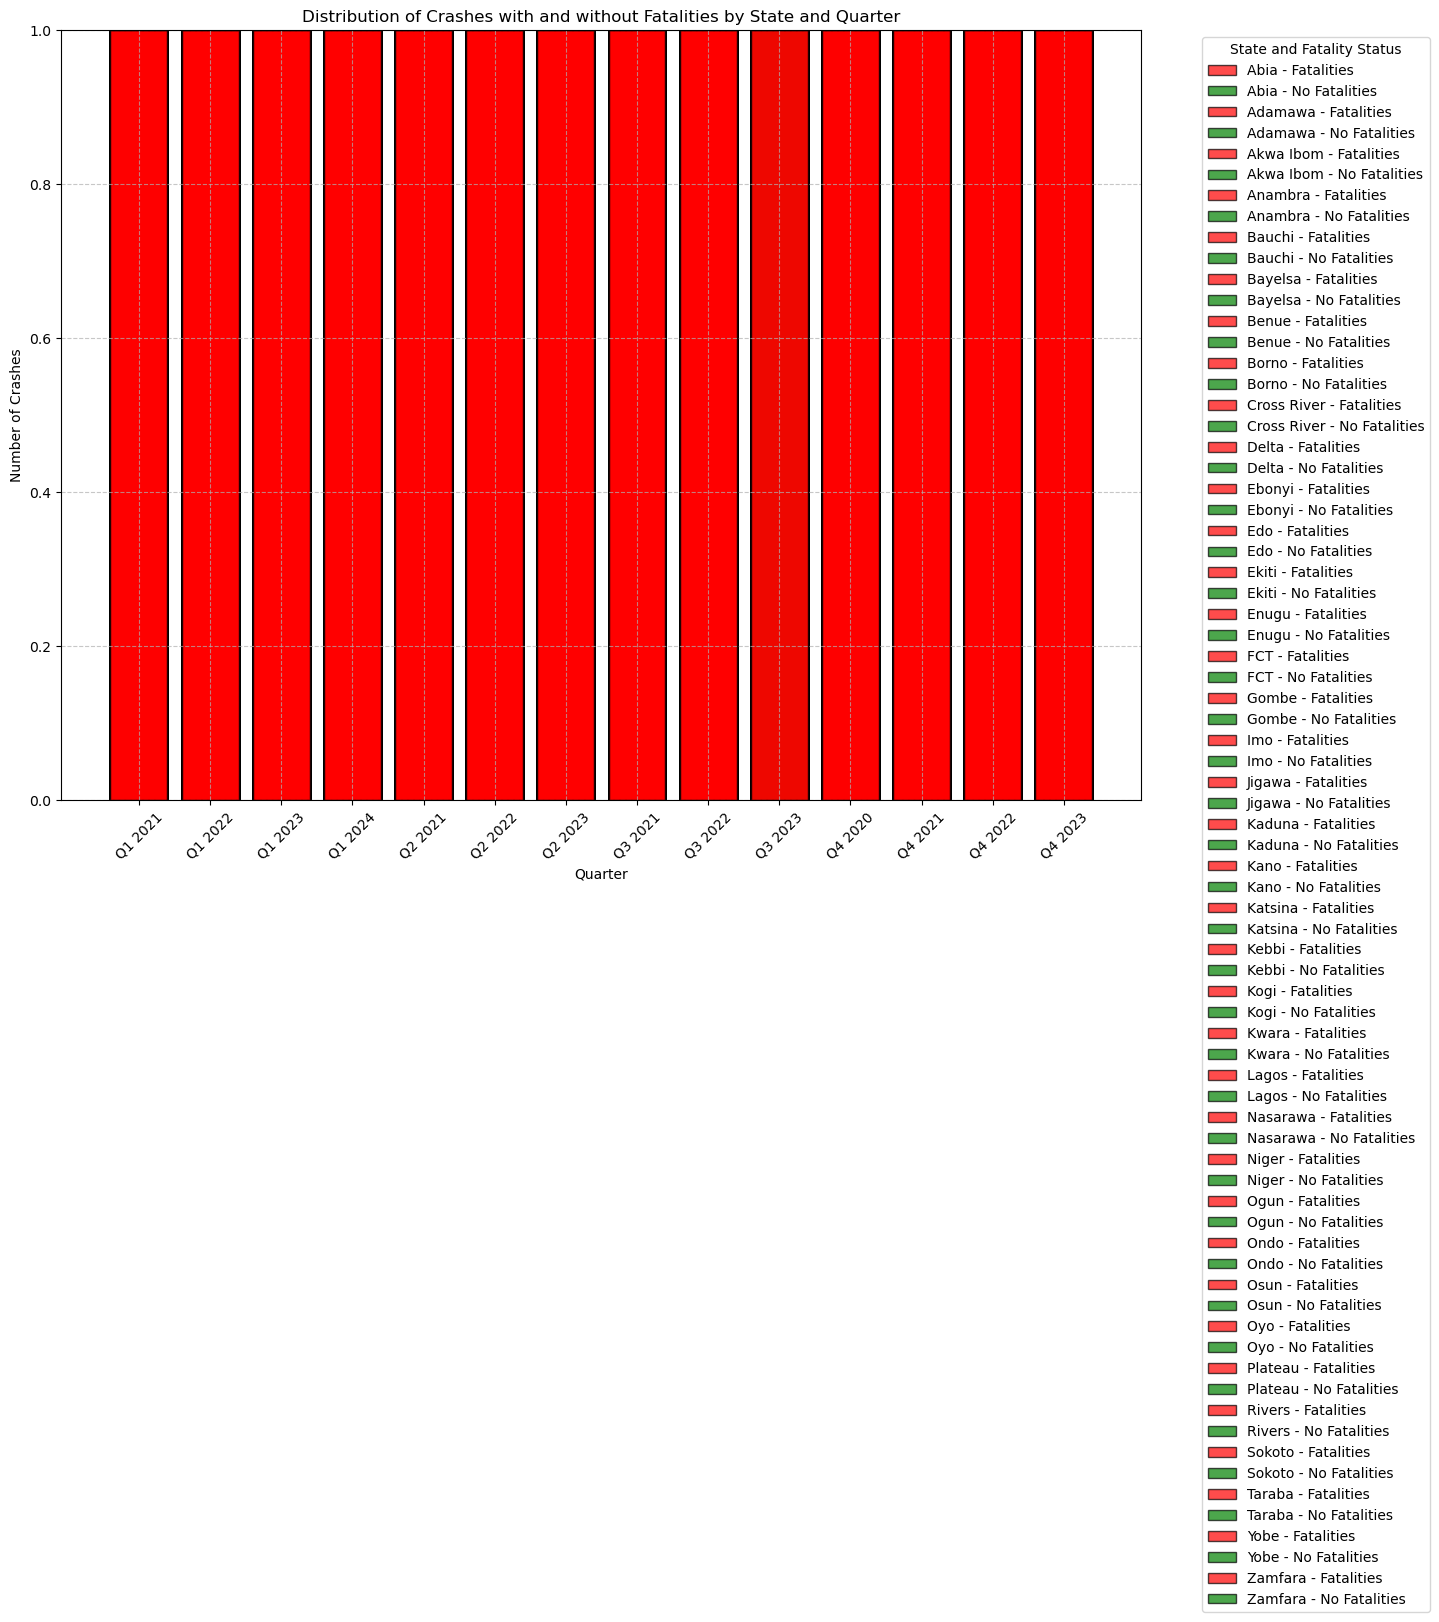

In [36]:
Crashes['Has_Fatality'] = Crashes['Num_Killed'] > 0

state_quarter_fatalities = Crashes.groupby(['State', 'Quarter', 'Has_Fatality']).size().unstack(fill_value=0).reset_index()

print("Distribution of Crashes with and without Fatalities by State and Quarter:")
print(state_quarter_fatalities)

plt.figure(figsize=(16, 10))  

for state in state_quarter_fatalities['State'].unique():
    subset = state_quarter_fatalities[state_quarter_fatalities['State'] == state]
    plt.bar(subset['Quarter'], subset[True], label=f"{state} - Fatalities", color='red', edgecolor='black', alpha=0.7)
    plt.bar(subset['Quarter'], subset[False], bottom=subset[True], label=f"{state} - No Fatalities", color='green', edgecolor='black', alpha=0.7)

plt.title('Distribution of Crashes with and without Fatalities by State and Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Crashes')
plt.legend(title='State and Fatality Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplots_adjust(right=0.8)  

plt.show()


Impact of Poor Weather on Crashes and Injuries by State:
          State  PWR_Crash_Percent  PWR_Injury_Percent
0          Abia           0.589971            0.165700
1       Adamawa           0.000000            0.000000
2     Akwa Ibom           0.416667            0.204499
3       Anambra           0.315457            0.135410
4        Bauchi           0.120409            0.029032
5       Bayelsa           1.418440            0.668896
6         Benue           0.000000            0.000000
7         Borno           0.000000            0.000000
8   Cross River           0.243902            0.097561
9         Delta           0.597015            0.204918
10       Ebonyi           0.000000            0.000000
11          Edo           0.121655            0.047664
12        Ekiti           0.000000            0.000000
13        Enugu           0.000000            0.000000
14          FCT           0.247321            0.136286
15        Gombe           0.000000            0.000000
16      

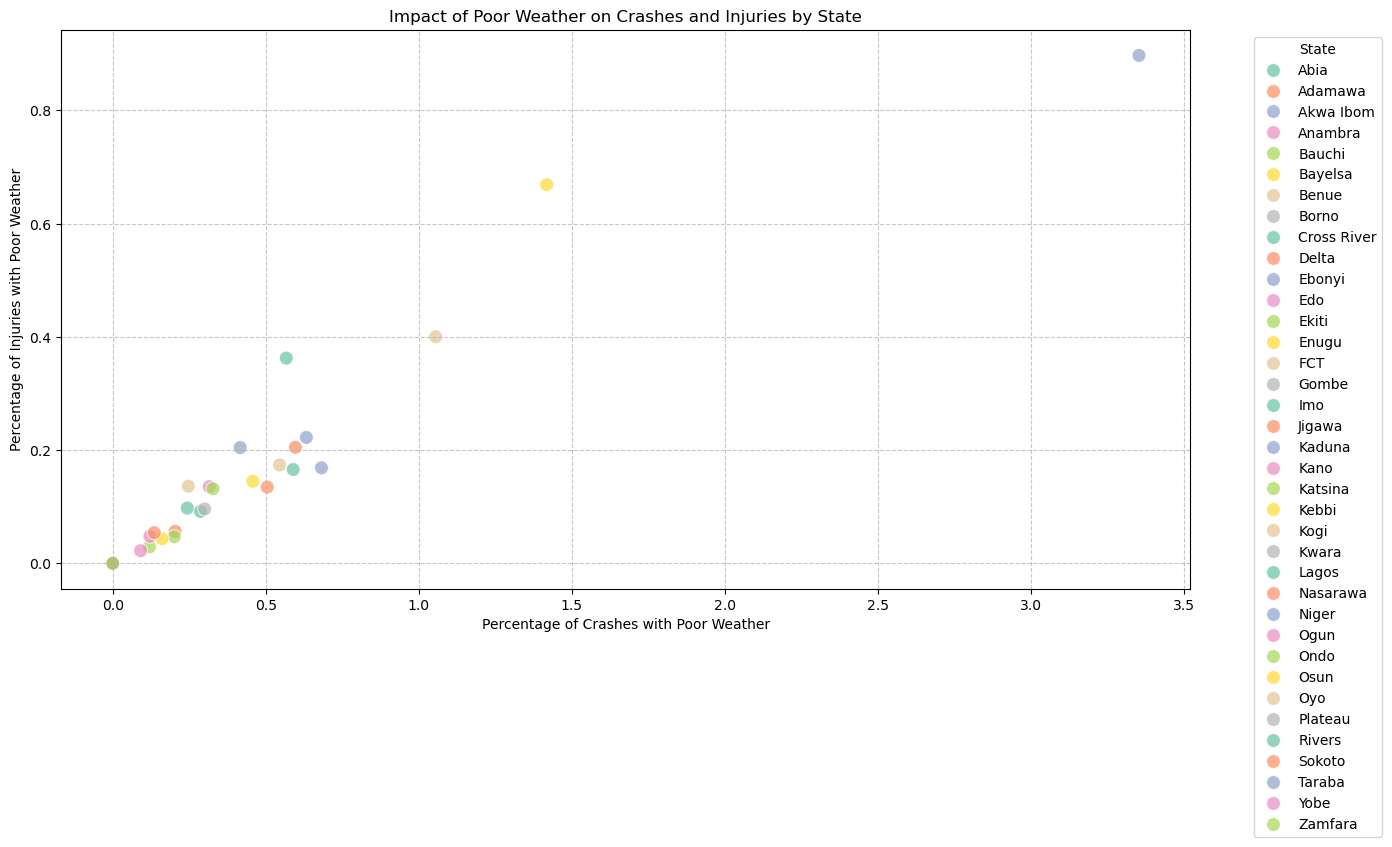

In [26]:
state_weather_impact = Crashes.groupby('State').agg({
    'Total_Crashes': 'sum',
    'PWR': 'sum',
    'Num_Injured': 'sum'
}).reset_index()

state_weather_impact['PWR_Crash_Percent'] = (state_weather_impact['PWR'] / state_weather_impact['Total_Crashes']) * 100
state_weather_impact['PWR_Injury_Percent'] = (state_weather_impact['PWR'] / state_weather_impact['Num_Injured']) * 100

print("Impact of Poor Weather on Crashes and Injuries by State:")
print(state_weather_impact[['State', 'PWR_Crash_Percent', 'PWR_Injury_Percent']])

plt.figure(figsize=(14, 8))

sns.scatterplot(data=state_weather_impact, x='PWR_Crash_Percent', y='PWR_Injury_Percent', hue='State', palette='Set2', s=100, alpha=0.7)

plt.title('Impact of Poor Weather on Crashes and Injuries by State')
plt.xlabel('Percentage of Crashes with Poor Weather')
plt.ylabel('Percentage of Injuries with Poor Weather')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The quarter with the highest number of DUI-related crashes is: Quarter Q1 2024 with 10 crashes.


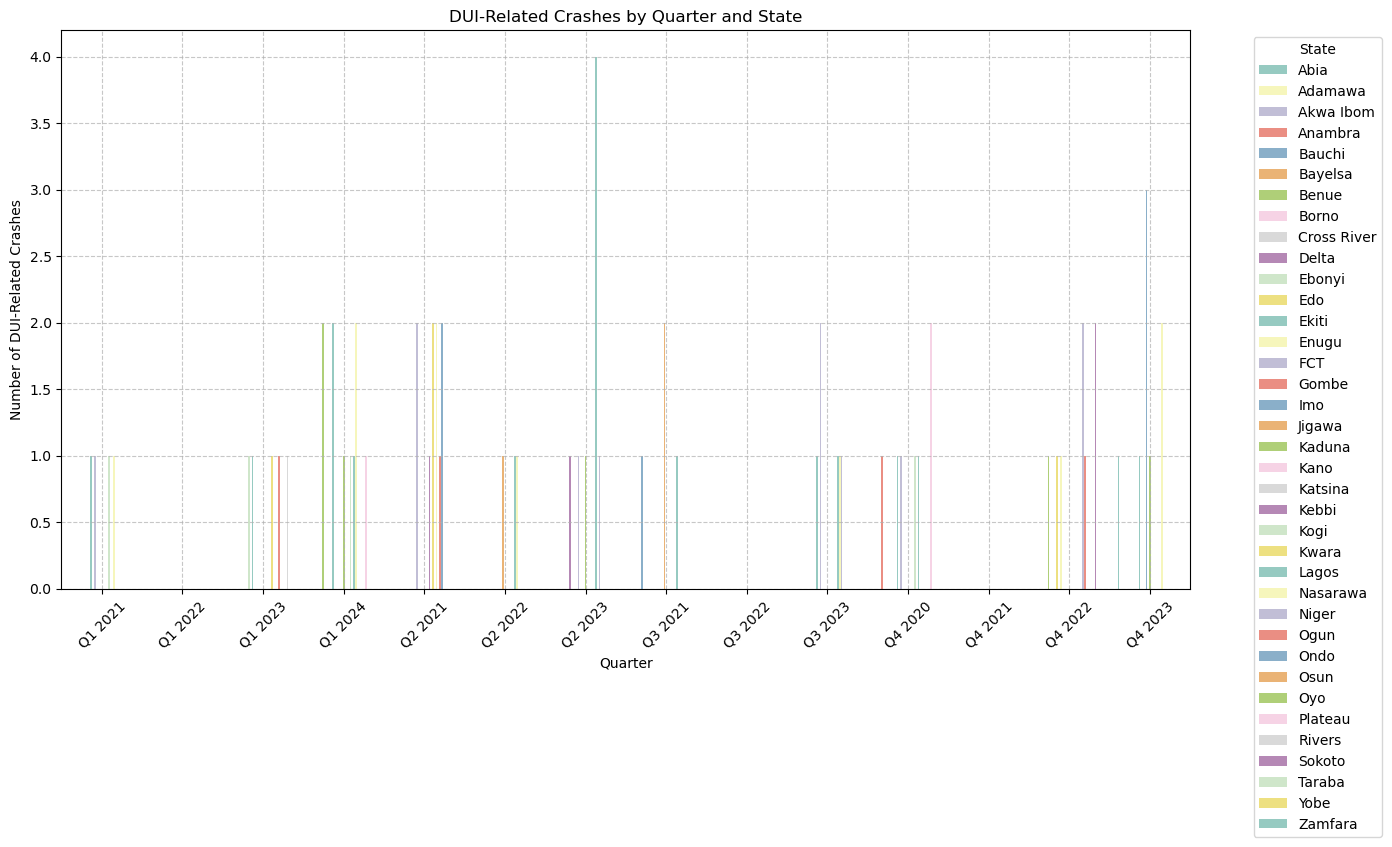

In [29]:
quarterly_dui_crashes = Crashes.groupby(['Quarter', 'State'])['DAD'].sum().reset_index()

highest_dui_quarter = quarterly_dui_crashes.groupby('Quarter')['DAD'].sum().idxmax()
highest_dui_quarter_value = quarterly_dui_crashes.groupby('Quarter')['DAD'].sum().max()

print(f"The quarter with the highest number of DUI-related crashes is: Quarter {highest_dui_quarter} with {highest_dui_quarter_value} crashes.")

plt.figure(figsize=(14, 8))
sns.barplot(data=quarterly_dui_crashes, x='Quarter', y='DAD', hue='State', palette='Set3')

plt.title('DUI-Related Crashes by Quarter and State')
plt.xlabel('Quarter')
plt.ylabel('Number of DUI-Related Crashes')
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Correlation between fatigue-related crashes (FTQ) and total vehicles involved across states: 0.9809430827559782


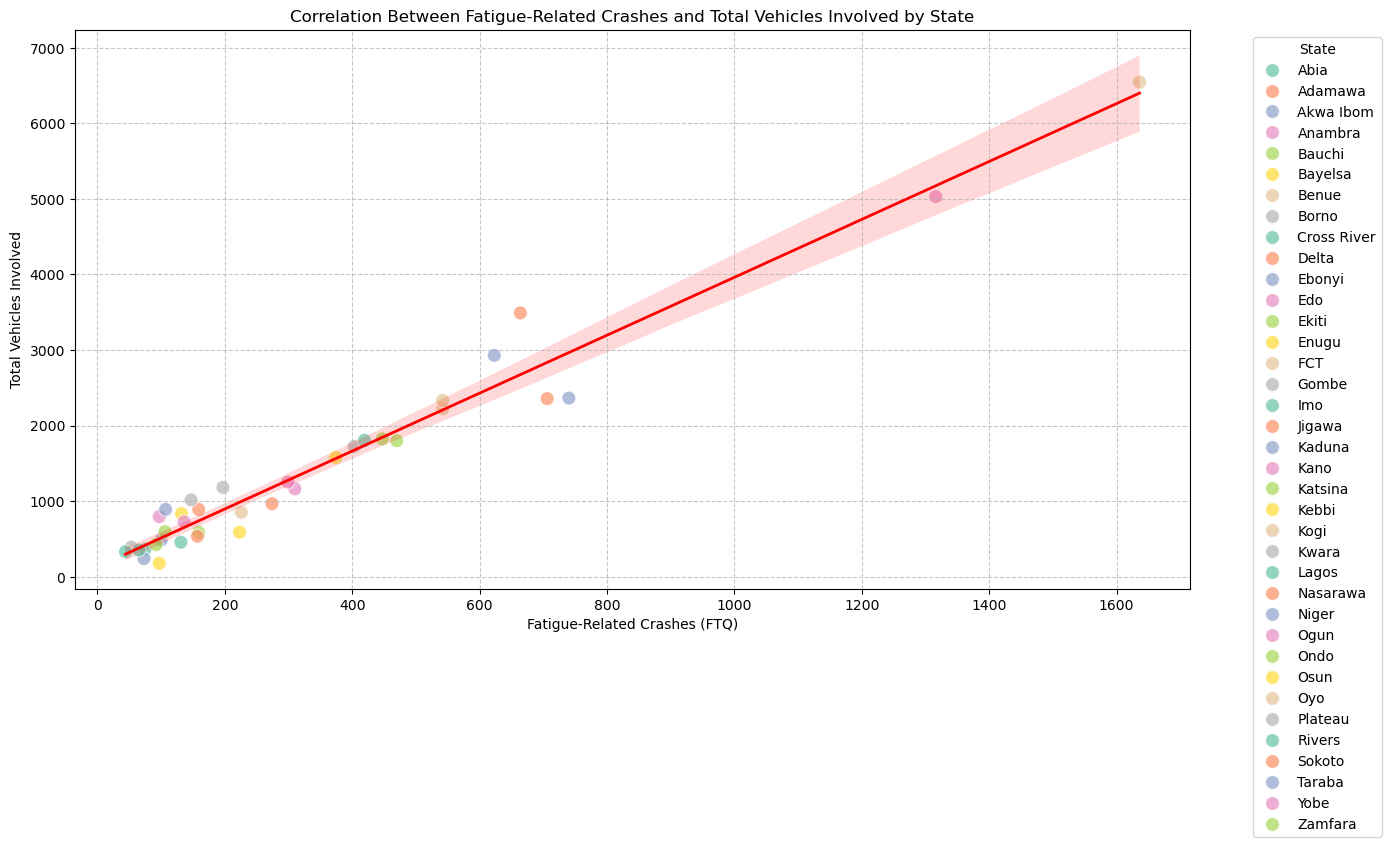

In [30]:
fatigue_vehicle_data = Crashes.groupby('State').agg({
    'FTQ': 'sum',
    'Total_Vehicles_Involved': 'sum'
}).reset_index()

correlation = fatigue_vehicle_data[['FTQ', 'Total_Vehicles_Involved']].corr().iloc[0, 1]

print(f"Correlation between fatigue-related crashes (FTQ) and total vehicles involved across states: {correlation}")


plt.figure(figsize=(14, 8))
sns.scatterplot(data=fatigue_vehicle_data, x='FTQ', y='Total_Vehicles_Involved', hue='State', palette='Set2', s=100, alpha=0.7)


sns.regplot(data=fatigue_vehicle_data, x='FTQ', y='Total_Vehicles_Involved', scatter=False, color='red', line_kws={"linewidth": 2})

plt.title('Correlation Between Fatigue-Related Crashes and Total Vehicles Involved by State')
plt.xlabel('Fatigue-Related Crashes (FTQ)')
plt.ylabel('Total Vehicles Involved')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


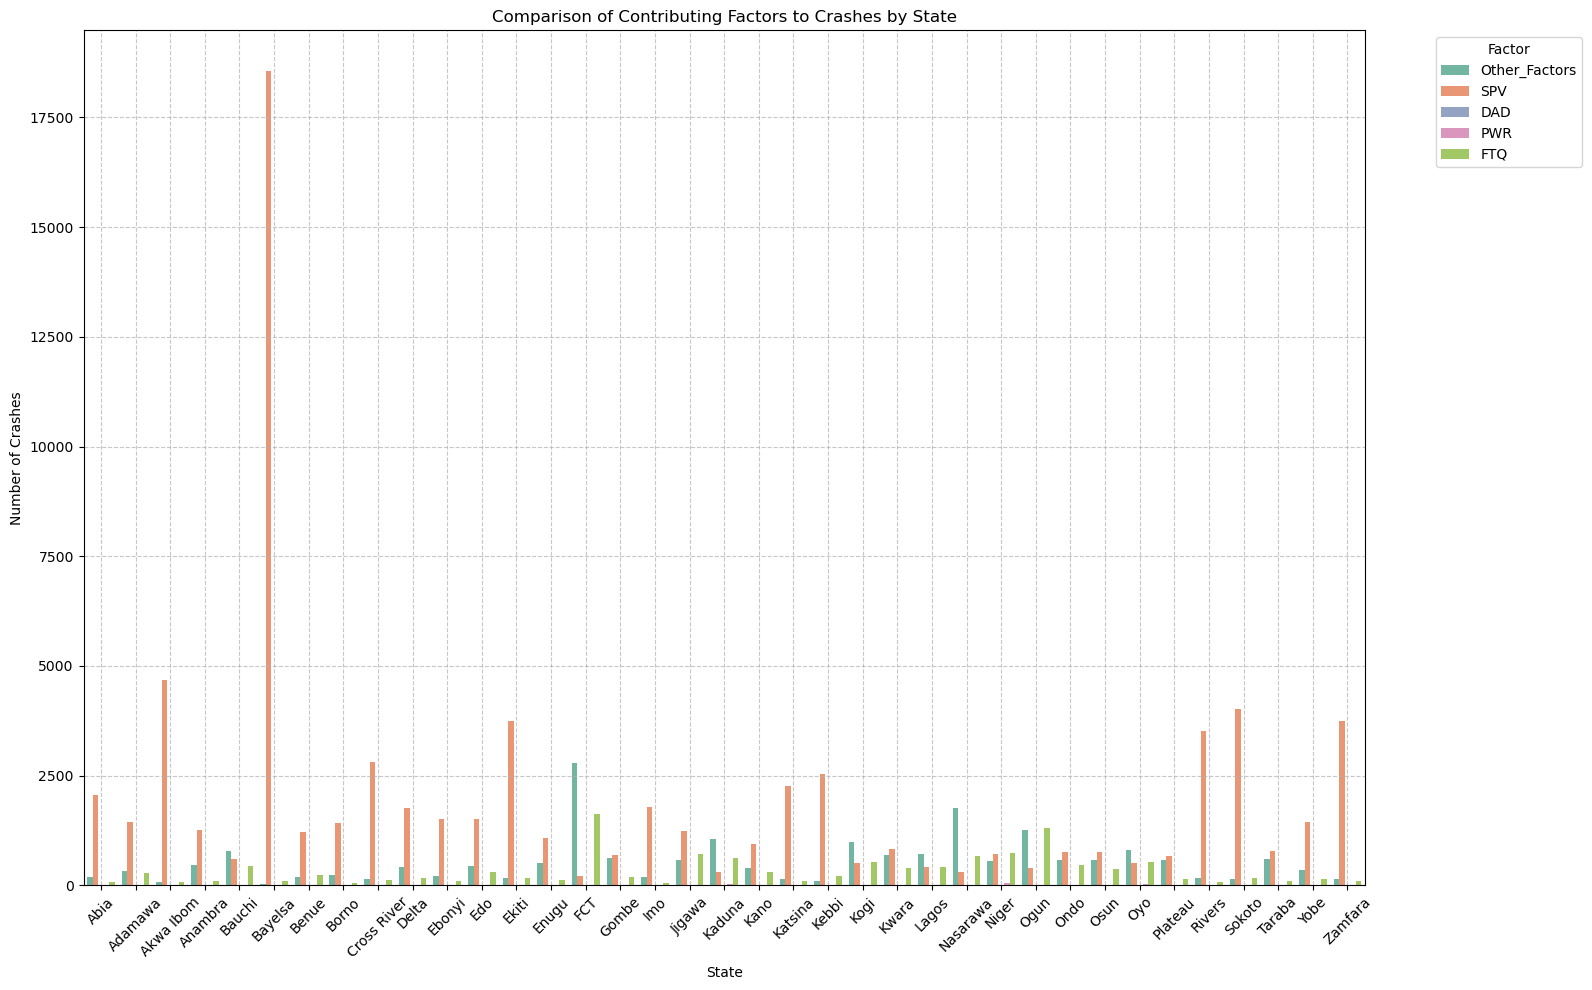

Aggregated crash data by state and contributing factors:
          State  Other_Factors           SPV  DAD  PWR   FTQ
0          Abia            196   2050.893350    1    2    75
1       Adamawa            326   1445.188725    0    0   274
2     Akwa Ibom             73   4683.774807    0    1    73
3       Anambra            470   1263.810855    1    2    97
4        Bauchi            780    606.227812    1    2   447
5       Bayelsa             33  18557.269318    0    2    97
6         Benue            180   1217.138253    3    0   226
7         Borno            228   1424.922019    0    0    53
8   Cross River            155   2813.802993    0    1   131
9         Delta            424   1770.393764    1    4   159
10       Ebonyi            216   1509.358239    1    0   100
11          Edo            451   1500.500758    1    1   310
12        Ekiti            156   3747.608878    7    0   159
13        Enugu            506   1073.925876    1    0   132
14          FCT           27

In [32]:
factors_data = Crashes.groupby('State').agg({
    'Other_Factors': 'sum',
    'SPV': 'sum',
    'DAD': 'sum',
    'PWR': 'sum',
    'FTQ': 'sum'
}).reset_index()

melted_factors_data = factors_data.melt(id_vars='State', var_name='Other_Factors', value_name='Crashes')

plt.figure(figsize=(16, 10))
sns.barplot(data=melted_factors_data, x='State', y='Crashes', hue='Other_Factors', palette='Set2')

plt.title('Comparison of Contributing Factors to Crashes by State')
plt.xlabel('State')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.legend(title='Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Aggregated crash data by state and contributing factors:")
print(factors_data)